# Iniziamo con la fase di preprocessing e test dei modelli

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_csv('archive/tracks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

### Per via della poca potenza computazionale campioniamo 🥲

In [3]:
SAMPLE_SIZE = 50000
df2 = df.sample(n=SAMPLE_SIZE, random_state=42)

In [ ]:
#standardizzazione prepro

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
laben = LabelEncoder()
scaler = StandardScaler()
minmax = MinMaxScaler()

#di proposito df completo per vedere come si comportano i modelli con colonne che toglieremo dopo
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = laben.fit_transform(df2[col])

df2.info()

df_scalato = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df_minmax = pd.DataFrame(minmax.fit_transform(df2), columns = df2.columns)

lista_df = [df2, df_scalato, df_minmax]

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 241517 to 356060
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50000 non-null  int64  
 1   name              50000 non-null  int64  
 2   popularity        50000 non-null  int64  
 3   duration_ms       50000 non-null  int64  
 4   explicit          50000 non-null  int64  
 5   artists           50000 non-null  int64  
 6   id_artists        50000 non-null  int64  
 7   release_date      50000 non-null  int64  
 8   danceability      50000 non-null  float64
 9   energy            50000 non-null  float64
 10  key               50000 non-null  int64  
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  int64  
 13  speechiness       50000 non-null  float64
 14  acousticness      50000 non-null  float64
 15  instrumentalness  50000 non-null  float64
 16  liveness          50000 non-null  float

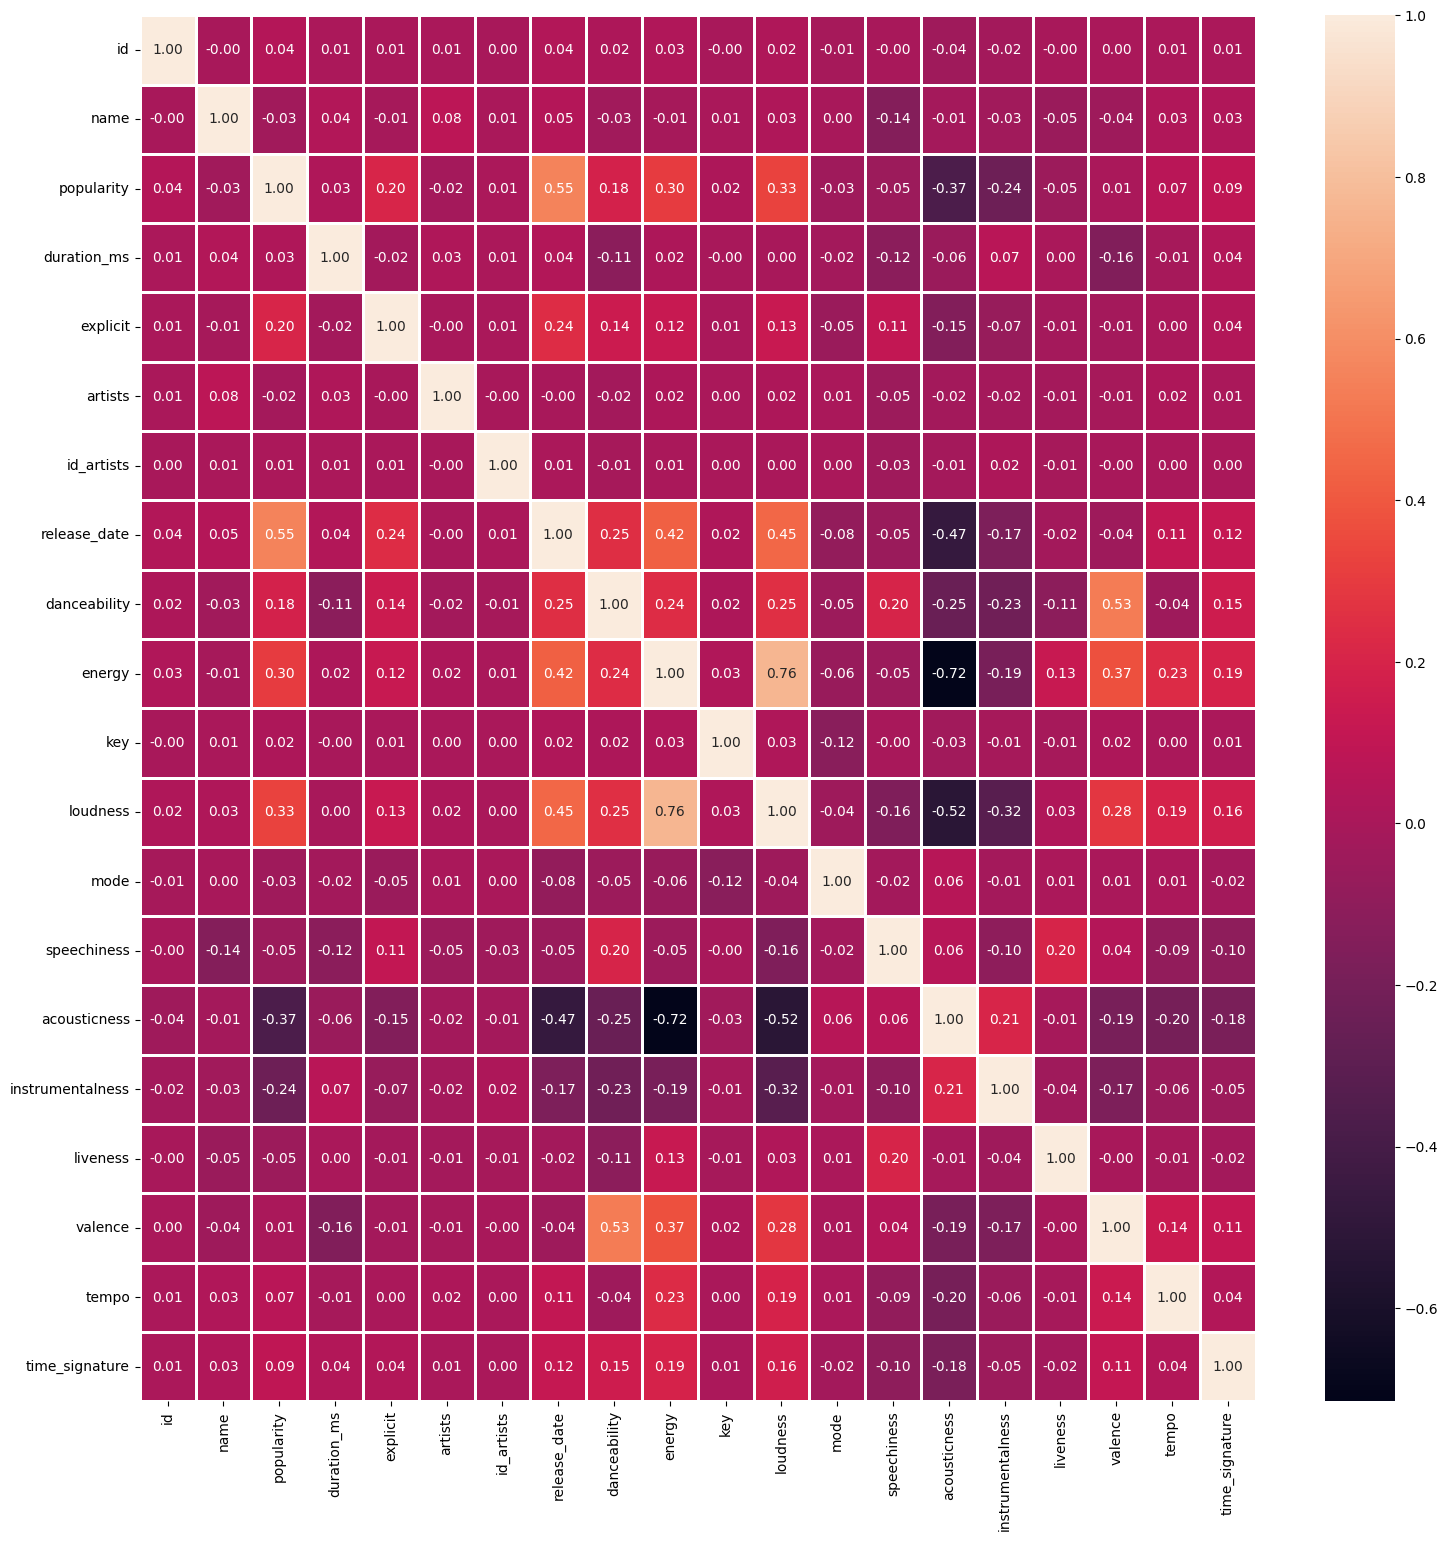

In [5]:
fig, ax = plt.subplots(figsize=(18,18))

sns.heatmap(
    df2.corr(numeric_only=True),
    ax=ax,
    annot=True, #per vedere i numeri oltre che il mero grafico
    fmt='.2f', #decimali considerati
    linewidths=1 #linea separazione
    )

plt.show()

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

linearreg = LinearRegression()
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)
decisiontree = DecisionTreeRegressor(max_depth=10, random_state=42)
randomforest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
knn = KNeighborsRegressor()
gradient = GradientBoostingRegressor(n_estimators=100, random_state=42)

lista_modelli = [linearreg, lasso, ridge, decisiontree, randomforest, knn, gradient]

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def addestra_modello(df, modello, target):
    
    X = df[[col for col in df.columns if col != target]]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modello.fit(X_train, y_train)

    y_predetta_con_X_test = modello.predict(X_test)
    y_predetta_con_X_train = modello.predict(X_train)

    mae_test = mean_absolute_error(y_test, y_predetta_con_X_test)
    mae_train = mean_absolute_error(y_train, y_predetta_con_X_train)

    mse_test = mean_squared_error(y_test, y_predetta_con_X_test)
    mse_train = mean_squared_error(y_train, y_predetta_con_X_train)

    r2_test = r2_score(y_test, y_predetta_con_X_test)
    r2_train = r2_score(y_train, y_predetta_con_X_train)

    rmse_test = np.sqrt(mse_test)
    rmse_train = np.sqrt(mse_train)

    return mae_test, mae_train, r2_test, r2_train, mse_test, mse_train, rmse_test, rmse_train

In [10]:
def risultati_predizioni(lista_df, lista_modelli, target):

    risultati = []
    
    print(f'''
df1 = df pulito
df2 = df scalato
df3 = df minmax
_________________________________________      
''')
    contatore = 1  
    for df in lista_df:
        print(f'\n Risultati per df{contatore}\n')
        for modello in lista_modelli:
            mae_test,mae_train,r2_test,r2_train,mse_test,mse_train,rmse_test,rmse_train=addestra_modello(df,modello,target)
            print(f'''
in base all\' addestramento del modello {type(modello).__name__} e calcolate le metriche ne deriva che:
    mae_test : {mae_test}
    mae_train : {mae_train}
    mse_test : {mse_test}
    mse_train : {mse_train}
    r2_test : {r2_test}
    r2_train : {r2_train}
    rmse_test : {rmse_test}
    rmse_train : {rmse_train}
''')
            risultati.append({
        'model': type(modello).__name__,
        'mae_test': mae_test, 'mse_test': mse_test, 'rmse_test': rmse_test, 'r2_test': r2_test,
        'mae_train': mae_train, 'mse_train': mse_train, 'rmse_train': rmse_train, 'r2_train': r2_train
    })
            
        contatore +=1
    
    df_risultati = pd.DataFrame(risultati).sort_values('rmse_test')
    display(df_risultati)  # SOLO SE USO IL CACCHIO DI notebook mostra tabella

    #me lo sparo a grafico
    plt.figure(figsize=(8,5))
    plt.bar(df_risultati['model'], df_risultati['rmse_test'])
    plt.title('Confronto RMSE (test) per modello')
    plt.ylabel('RMSE (test)')
    plt.xlabel('Modello')
    plt.grid(axis='y', alpha=0.3)
    plt.show()


df1 = df pulito
df2 = df scalato
df3 = df minmax
_________________________________________      


 Risultati per df1


in base all' addestramento del modello LinearRegression e calcolate le metriche ne deriva che:
    mae_test : 11.48501371941981
    mae_train : 11.50799096664359
    mse_test : 216.42885012560274
    mse_train : 217.63352989509934
    r2_test : 0.3465329241498769
    r2_train : 0.35087705854934315
    rmse_test : 14.711520999733601
    rmse_train : 14.752407596561971


in base all' addestramento del modello Lasso e calcolate le metriche ne deriva che:
    mae_test : 11.715692398364336
    mae_train : 11.780701987785278
    mse_test : 226.72546404056914
    mse_train : 229.13394540596576
    r2_test : 0.3154441936859579
    r2_train : 0.3165754344020133
    rmse_test : 15.057405621174224
    rmse_train : 15.137170984234992


in base all' addestramento del modello Ridge e calcolate le metriche ne deriva che:
    mae_test : 11.484975500640392
    mae_train : 11.50797026

,model,mae_test,mse_test,rmse_test,r2_test,mae_train,mse_train,rmse_train,r2_train
18,RandomForestRegressor,0.102731,0.019033,0.137961,0.492216,0.094697,0.016164,0.127138,0.574003
20,GradientBoostingRegressor,0.106147,0.019800,0.140714,0.471749,0.105129,0.019258,0.138771,0.492475
17,DecisionTreeRegressor,0.106828,0.021111,0.145297,0.436783,0.096262,0.017299,0.131527,0.544080
16,Ridge,0.122184,0.024494,0.156505,0.346536,0.122428,0.024630,0.156941,0.350877
14,LinearRegression,0.122181,0.024494,0.156506,0.346533,0.122425,0.024630,0.156941,0.350877
19,KNeighborsRegressor,0.124438,0.026517,0.162841,0.292552,0.101409,0.017469,0.132170,0.539616
15,Lasso,0.160021,0.037484,0.193608,-0.000027,0.161875,0.037944,0.194792,0.000000
11,RandomForestRegressor,0.527968,0.503006,0.709229,0.492043,0.486711,0.427019,0.653467,0.574017
13,GradientBoostingRegressor,0.546206,0.523263,0.723369,0.471587,0.540982,0.509266,0.713628,0.491969
10,DecisionTreeRegressor,0.549267,0.557841,0.746887,0.436670,0.494643,0.456817,0.675882,0.544291


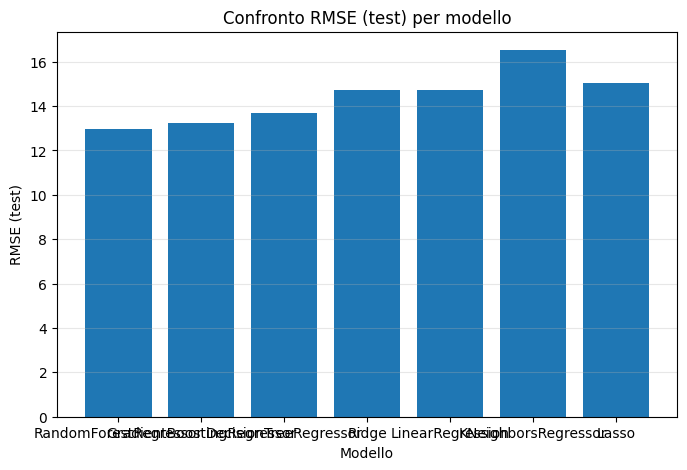

In [11]:
risultati_predizioni(lista_df, lista_modelli, target='popularity')

## 🥇 PRIMO POSTO (RandomForest):

In base ai risultati R2_score RandomForest riesce a spiegare quasi il 50% della varianza dei dati,

che è il risultato migliore tra quelli testati.

### 🥈 SECONDO POSTO (GradientBoostingRegressor):

L'R2_test molto vicino a RandomForest e comunque la differenza tra r2_train e r2_test è minima,

quindi non va troppo in overfitting e generalizza bene.

# Cerchiamo gli iperparametri migliori

Provo ad utilizzare l'intero dataset 🎰

In [22]:
def splittagio_e_X_y(df, target):
    X = df[[col for col in df.columns if col != target]]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X, y, X_train, X_test, y_train, y_test

In [23]:
def final_step(dic_df_tot, dic_models, params):
    '''
    Per questa funzione ricordarsi di passare DIZIONARI di df, modelli e parametri
    '''
    for nome_model, model in dic_models.items():
        print(f'===NOME MODELLO: {nome_model}===\n\n')
        for nome_df,dataframe in dic_df_tot.items():
            print(f'## Test con: {nome_df} ##\n\n')

            X, y, X_train, X_test, y_train, y_test = splittagio_e_X_y(dataframe, target='popularity')

            search = GridSearchCV(model, param_grid = params, cv=3, scoring='r2', n_jobs=-1)
            search.fit(X_train, y_train)
            best = search.best_estimator_

            y_pred_ = best.predict(X_test)
            print("\nPrestazioni sul test set:")
            print("MAE:", mean_absolute_error(y_test, y_pred_))
            print("MSE:", mean_squared_error(y_test, y_pred_))
            print("R2:", r2_score(y_test, y_pred_))
            print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_)))

            importances = best.feature_importances_
            feature_names = X.columns 

            # DataFrame per plot
            feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

            plt.figure(figsize=(12, 6))
            sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', hue='Feature', palette='viridis',legend=False)
            plt.title(f'Top 10 Fattori Chiave per la Popolarità (Secondo {nome_model.upper()})')
            plt.xlabel('Importanza')
            plt.ylabel(None)
            plt.show()

            residui = y_test - y_pred_

            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=y_pred_, y=residui, alpha=0.5)
            plt.axhline(0, color='red', linestyle='--', linewidth=2)
            plt.title(f'Analisi dei Residui {nome_model.upper()}')
            plt.xlabel('Valori Predetti (Popolarità)')
            plt.ylabel('Errore (Reale - Predetto)')
            plt.show()

    return best

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

===NOME MODELLO: RandomForest===


## Test con: df ##



Prestazioni sul test set:
MAE: 11.87324182881032
MSE: 224.10664301326202
R2: 0.33026186396822044
RMSE: 14.970191816181314


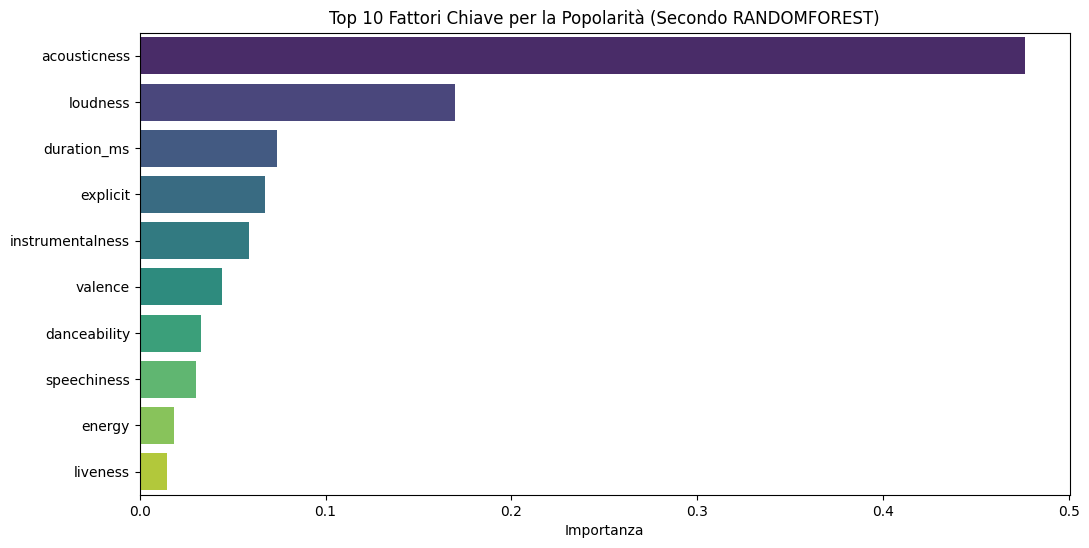

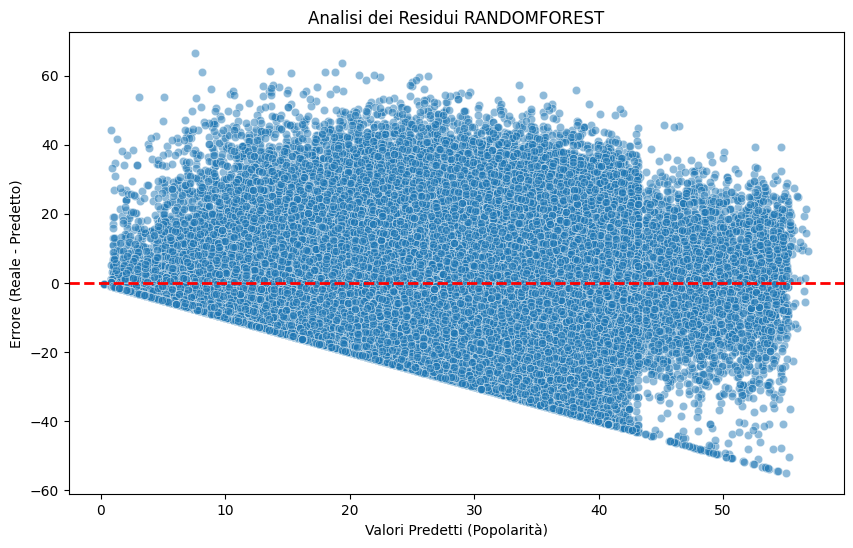

In [ ]:
from sklearn.model_selection import GridSearchCV

df_tot = df.drop(columns=['id', 'name', 'release_date', 'id_artists', 'artists'])

dic_models = {'RandomForest' : RandomForestRegressor()}

params = {'n_estimators' : [100],'max_depth' : [10]}

dic_df_tot = {'df':df_tot}

best = final_step(dic_df_tot, dic_models, params)

# Salviamo il file
Sono stanco capo 🫠

In [32]:
import joblib

nome_file = f'modello_spotify_randomforest.pkl'
joblib.dump(best, nome_file)

print(f'''
Modello salvato nel file:\n#####\n{nome_file}\n#####\n
Ora potrò usare questo modello per capiresu cosa concentrarmi per far uscire
'From Here', il mio brano math rock, su Spoty!
''')


Modello salvato nel file:
#####
modello_spotify_randomforest.pkl
#####

Ora potrò usare questo modello per capiresu cosa concentrarmi per far uscire
'From Here', il mio brano math rock, su Spoty!

